# APRENDIZAJE SUPERVISADO

## Importación de librerias

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Lectura del dataset

In [49]:
df_test = pd.read_csv("C:/Users/anto_/OneDrive/Escritorio/Diplomatura en Ciencia de Datos/4. Aprendizaje supervisado/AprendizajeSupervisado-master/practico/data/travel_insurance_prediction_test.csv")
df_train = pd.read_csv("C:/Users/anto_/OneDrive/Escritorio/Diplomatura en Ciencia de Datos/4. Aprendizaje supervisado/AprendizajeSupervisado-master/practico/data/travel_insurance_prediction_train.csv")
df_submission = pd.read_csv("C:/Users/anto_/OneDrive/Escritorio/Diplomatura en Ciencia de Datos/4. Aprendizaje supervisado/AprendizajeSupervisado-master/practico/data/travel_insurance_submission.csv")

In [50]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer             1490 non-null   int64 
 1   Age                  1490 non-null   int64 
 2   Employment Type      1490 non-null   object
 3   GraduateOrNot        1490 non-null   object
 4   AnnualIncome         1490 non-null   int64 
 5   FamilyMembers        1490 non-null   int64 
 6   ChronicDiseases      1490 non-null   int64 
 7   FrequentFlyer        1490 non-null   object
 8   EverTravelledAbroad  1490 non-null   object
 9   TravelInsurance      1490 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 116.5+ KB


In [51]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer             497 non-null    int64 
 1   Age                  497 non-null    int64 
 2   Employment Type      497 non-null    object
 3   GraduateOrNot        497 non-null    object
 4   AnnualIncome         497 non-null    int64 
 5   FamilyMembers        497 non-null    int64 
 6   ChronicDiseases      497 non-null    int64 
 7   FrequentFlyer        497 non-null    object
 8   EverTravelledAbroad  497 non-null    object
dtypes: int64(5), object(4)
memory usage: 35.1+ KB


In [52]:
df_train

,Customer,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,1,33,Private Sector/Self Employed,Yes,550000,6,0,No,No,1
1,2,28,Private Sector/Self Employed,Yes,800000,7,0,Yes,No,0
2,3,31,Private Sector/Self Employed,Yes,1250000,4,0,No,No,0
3,4,31,Government Sector,No,300000,7,0,No,No,0
4,5,28,Private Sector/Self Employed,Yes,1250000,3,0,No,No,0
...,...,...,...,...,...,...,...,...,...,...
1485,1486,31,Government Sector,No,300000,5,0,No,No,0
1486,1487,31,Private Sector/Self Employed,Yes,950000,3,0,Yes,No,0
1487,1488,28,Private Sector/Self Employed,Yes,1250000,5,0,No,No,0
1488,1489,31,Government Sector,Yes,1300000,5,0,No,No,0


In [53]:
df_test

,Customer,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,1491,29,Private Sector/Self Employed,Yes,1100000,4,0,No,No
1,1492,28,Private Sector/Self Employed,Yes,750000,5,1,Yes,No
2,1493,31,Government Sector,Yes,1500000,4,0,Yes,Yes
3,1494,28,Private Sector/Self Employed,Yes,1400000,3,0,No,Yes
4,1495,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes
...,...,...,...,...,...,...,...,...,...
492,1983,33,Government Sector,Yes,1750000,6,0,No,No
493,1984,25,Private Sector/Self Employed,No,1150000,3,1,No,No
494,1985,29,Private Sector/Self Employed,Yes,1050000,5,0,No,No
495,1986,25,Government Sector,Yes,750000,2,0,No,Yes


## Análisis descriptivo

In [54]:
df_train.describe().round()

,Customer,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1490.0,1490.0,1490.0,1490.0,1490.0,1490.0
mean,746.0,30.0,927819.0,5.0,0.0,0.0
std,430.0,3.0,381172.0,2.0,0.0,0.0
min,1.0,25.0,300000.0,2.0,0.0,0.0
25%,373.0,28.0,600000.0,4.0,0.0,0.0
50%,746.0,29.0,900000.0,5.0,0.0,0.0
75%,1118.0,32.0,1250000.0,6.0,1.0,1.0
max,1490.0,35.0,1800000.0,9.0,1.0,1.0


### Variable objetivo o target: Travel Insurance

In [55]:
df_train["TravelInsurance"].value_counts()

0    958
1    532
Name: TravelInsurance, dtype: int64

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TravelInsurance', ylabel='count'>

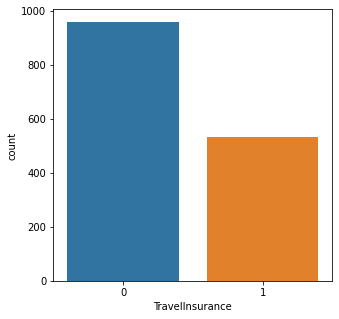

In [56]:
fig = plt.figure(figsize=(5,5))
sns.countplot(df_train.TravelInsurance)

### Correlación variables 

In [68]:
corr = df_train.corr().round(2)
corr=corr[['TravelInsurance']]
corr.loc[:,'abs_corr']=np.abs(corr['TravelInsurance'])
corr.sort_values(by='abs_corr',ascending = False).style.background_gradient()

,TravelInsurance,abs_corr
TravelInsurance,1.000000,1.000000
AnnualIncome,0.400000,0.400000
FamilyMembers,0.080000,0.080000
Age,0.070000,0.070000
Customer,-0.030000,0.030000
ChronicDiseases,0.020000,0.020000


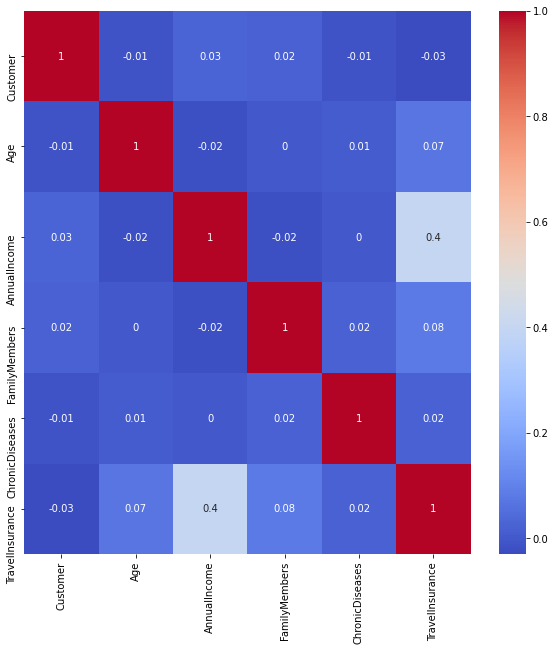

In [70]:
plt.figure(figsize=(10,10))
corr = df_train.corr().round(2)
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot=True, cmap= 'coolwarm')
plt.show()

### Variable explicativa: Age

En primer lugar, observamos la distribución de la variable Age en el df_train. 

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

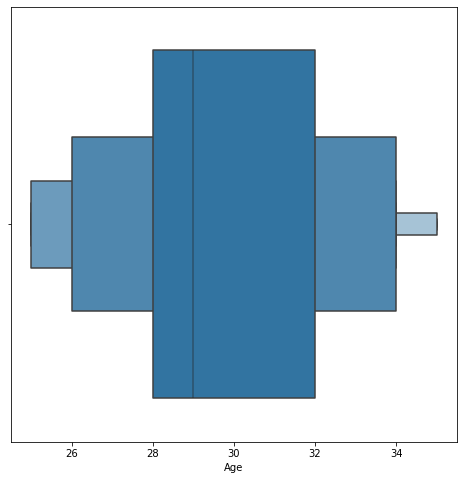

In [57]:
fig = plt.figure(figsize=(8,8))
sns.boxenplot(df_train.Age)

<AxesSubplot:xlabel='Age', ylabel='TravelInsurance'>

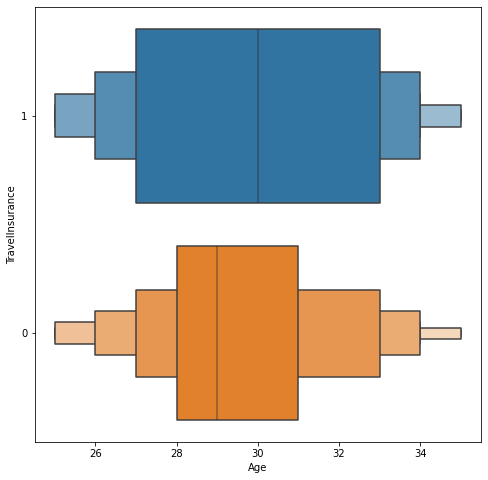

In [58]:
fig = plt.figure(figsize=(8,8))
sns.boxenplot(data=df_train, x="Age", y=df_train.TravelInsurance.apply(str))

In [59]:
df_train.groupby(["TravelInsurance"])["Age"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
TravelInsurance,,,,,,,,
0,958.0,29.52,2.62,25.0,28.0,29.0,31.0,35.0
1,532.0,29.93,3.28,25.0,27.0,30.0,33.0,35.0


Si bien la distribución de Age se encuentra contenida en el mismo rango de valores para ambas clases de la variable target (idénticos valores mínimos y máximos), podemos observar que la distribución del rango intercuartil sí se ve afectada. 
Podemos decir que Age es una variable que puede explicar en cierta medida a la variable objetivo. 

### Variable explicativa: AnnualIncome

En primer lugar, observamos la distribución de la variable Annual Income en el df_train. 

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


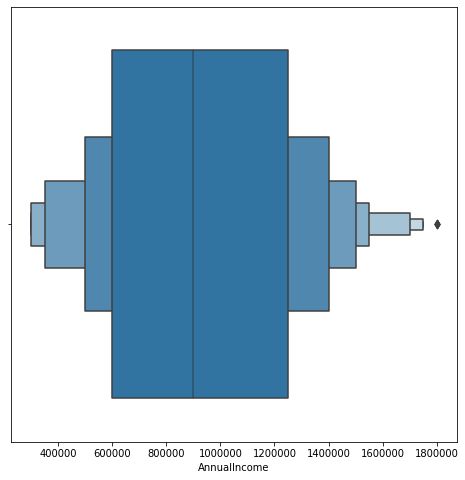

In [60]:
fig = plt.figure(figsize=(8,8))
sns.boxenplot(df_train.AnnualIncome)
plt.ticklabel_format(style='plain', axis='x')

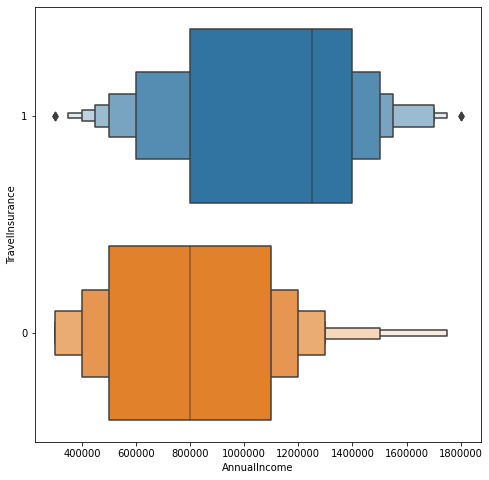

In [61]:
fig = plt.figure(figsize=(8,8))
sns.boxenplot(data=df_train, x="AnnualIncome", y=df_train.TravelInsurance.apply(str))
plt.ticklabel_format(style='plain', axis='x')

In [62]:
df_train.groupby(["TravelInsurance"])["AnnualIncome"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
TravelInsurance,,,,,,,,
0,958.0,815501.04,334762.83,300000.0,500000.0,800000.0,1100000.0,1750000.0
1,532.0,1130075.19,376433.35,300000.0,800000.0,1250000.0,1400000.0,1800000.0


Podemos observar que la distribución de la variable Annual Income se ve afectada en gran medida, al condicionarla por las distintas clases de la variable TARGET. Si bien los valores mínimos y máximos son similares, la media y la mediana difieren considerablemente, como así también el rango intercuantil. 
Es una varible que se considera importante para explicar el comportamiento de Y. 

### Variable explicativa: Employment Type

In [63]:
df_train["Employment Type"].value_counts()

Private Sector/Self Employed    1057
Government Sector                433
Name: Employment Type, dtype: int64

### Variable explicativa: Graduate Or Not

In [64]:
df_train["GraduateOrNot"].value_counts()

Yes    1268
No      222
Name: GraduateOrNot, dtype: int64

### Variable explicativa: Frequent Flyer

In [65]:
df_train["FrequentFlyer"].value_counts()

No     1173
Yes     317
Name: FrequentFlyer, dtype: int64

### Variable explicativa: Ever Travelled Abroad

In [66]:
df_train["EverTravelledAbroad"].value_counts()

No     1202
Yes     288
Name: EverTravelledAbroad, dtype: int64

Para el entrenamiento de los modelos no utilizaremos las variable Customer y Travel Insurance (Target)

In [67]:
X_train_total = df_train.drop(["Customer","TravelInsurance"], axis=1)
Y_train_total = df_train.TravelInsurance

## Encoding variables

In [13]:
numerical_cols = X_train_total.select_dtypes(include=['float64', 'int64']).columns

In [14]:
categorical_cols = X_train_total.select_dtypes(include=['object']).columns

In [15]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoder.fit(X_train_total[categorical_cols])
# We can inspect the categories found by the encoder
encoder.categories_

[array(['Government Sector', 'Private Sector/Self Employed'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [16]:
encoded_types = encoder.transform(X_train_total[categorical_cols])
encoded_types[:10]

array([[0., 1., 0., 1., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 1., 0.],
       [0., 1., 0., 1., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 1., 0., 1., 0.],
       [0., 1., 1., 0., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 1., 0., 1., 0.],
       [1., 0., 0., 1., 1., 0., 1., 0.],
       [0., 1., 1., 0., 0., 1., 1., 0.]])

In [17]:
X_train_total = X_train_total[numerical_cols].values
X_train_total[:10]

array([[     33,  550000,       6,       0],
       [     28,  800000,       7,       0],
       [     31, 1250000,       4,       0],
       [     31,  300000,       7,       0],
       [     28, 1250000,       3,       0],
       [     25, 1350000,       3,       1],
       [     33,  400000,       4,       0],
       [     26,  500000,       5,       0],
       [     31,  400000,       4,       0],
       [     35,  800000,       6,       0]], dtype=int64)

In [18]:
X_train_enc = np.hstack((encoded_types, X_train_total))
X_train_enc [:5]

array([[0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00, 1.00e+00, 0.00e+00,
        1.00e+00, 0.00e+00, 3.30e+01, 5.50e+05, 6.00e+00, 0.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00,
        1.00e+00, 0.00e+00, 2.80e+01, 8.00e+05, 7.00e+00, 0.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00, 1.00e+00, 0.00e+00,
        1.00e+00, 0.00e+00, 3.10e+01, 1.25e+06, 4.00e+00, 0.00e+00],
       [1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
        1.00e+00, 0.00e+00, 3.10e+01, 3.00e+05, 7.00e+00, 0.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00, 1.00e+00, 0.00e+00,
        1.00e+00, 0.00e+00, 2.80e+01, 1.25e+06, 3.00e+00, 0.00e+00]])

In [19]:
X_train_enc.shape

(1490, 12)

## Creación del train y validation

In [20]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_total, Y_train_total, test_size=0.2,random_state= 0)

## Modelos propuestos

## Primer modelo de prueba: Regresión Logística

In [21]:
#X_train_lreg = X_train_enc[np.concatenate((num_cols,cat_cols))]
#X_val_lreg = X_val_c[np.concatenate((num_cols,cat_cols))]

pipe = Pipeline([('scaler', StandardScaler()), ('lreg', LogisticRegression(random_state=0))])

pipe.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lreg', LogisticRegression(random_state=0))])

In [22]:
pipe['lreg'].classes_

array([0, 1], dtype=int64)

In [23]:
pipe['lreg'].get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [26]:
Y_train_predic_lreg = pipe.predict(X_train)
Y_val_pred_lreg = pipe.predict(X_valid)

In [27]:
text = "Logistic Regression - Reporte de clasificación del conjunto de train" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(Y_train, Y_train_predic_lreg))

Logistic Regression - Reporte de clasificación del conjunto de train
              precision    recall  f1-score   support

           0       0.78      0.88      0.82       766
           1       0.71      0.54      0.62       426

    accuracy                           0.76      1192
   macro avg       0.74      0.71      0.72      1192
weighted avg       0.75      0.76      0.75      1192



In [28]:
text = "Logistic Regression - Reporte de clasificación del conjunto de validation" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(Y_valid, Y_val_pred_lreg))

Logistic Regression - Reporte de clasificación del conjunto de validation
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       192
           1       0.65      0.50      0.57       106

    accuracy                           0.73       298
   macro avg       0.71      0.68      0.68       298
weighted avg       0.72      0.73      0.72       298



## Segundo modelo de prueba: Árbol de decisión

In [30]:
clf_tree = DecisionTreeClassifier(random_state=0)
clf_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [31]:
Y_train_pred = clf_tree.predict(X_train)
Y_valid_pred = clf_tree.predict(X_valid)

In [33]:
train_acc = accuracy_score(Y_train, Y_train_pred)
valid_acc = accuracy_score(Y_valid, Y_valid_pred)
print(f'Train accuracy: {train_acc:0.2}')
print(f'Test accuracy: {valid_acc:0.2}')

Train accuracy: 0.92
Test accuracy: 0.8
